In [1]:
import sys
sys.path.append(r'C:\Users\sieme\OneDrive\Documenten\16. TA, Probabilistic Design\bivariate\src\bivariate')


In [2]:
import class_multivar
# import class_dataset

## 1. Create a list with all the classes, methods and functions defined in a repository

In [3]:
import ast
import os

def extract_functions_and_classes(node):
    functions = []
    classes = []
    for n in ast.walk(node):
        if isinstance(n, ast.FunctionDef):
            functions.append(('function', n.name))
        elif isinstance(n, ast.ClassDef):
            classes.append(('class', n.name))
            functions.extend(('method', f'{n.name}.{m.name}') for m in ast.walk(n) if isinstance(m, ast.FunctionDef))

    return functions, classes

def process_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    try:
        parsed = ast.parse(content)
    except SyntaxError as e:
        print(f"Error parsing {file_path}: {e}")
        return [], []

    functions, classes = extract_functions_and_classes(parsed)
    return functions, classes

def generate_tree_structure(root_path):
    tree_structure = {}
    for foldername, subfolders, filenames in os.walk(root_path):
        for filename in filenames:
            if filename.endswith(".py"):
                file_path = os.path.join(foldername, filename)
                relative_path = os.path.relpath(file_path, root_path)

                functions, classes = process_file(file_path)

                if relative_path not in tree_structure:
                    tree_structure[relative_path] = {"entries": []}

                tree_structure[relative_path]["entries"].extend(classes + functions)

    return tree_structure

def print_tree_structure(tree_structure):
    for file_path, content in tree_structure.items():
        print(f"{file_path}:")
        for entry_type, entry_name in content["entries"]:
            print(f"  ├── [{entry_type}] {entry_name}")
        print()

if __name__ == "__main__":
    root_path = r"C:\Users\sieme\OneDrive\Documenten\16. TA, Probabilistic Design\bivariate"  # Replace with the actual path to your GitHub repository
    tree_structure = generate_tree_structure(root_path)
    print_tree_structure(tree_structure)



Error parsing C:\Users\sieme\OneDrive\Documenten\16. TA, Probabilistic Design\bivariate\setup.py: invalid syntax (<unknown>, line 12)
setup.py:

src\bivariate\class_dataset.py:
  ├── [class] Dataset
  ├── [method] Dataset.__init__
  ├── [method] Dataset.import_from_filename
  ├── [method] Dataset.import_from_surfdrive_path
  ├── [method] Dataset.import_from_surfdrive_file
  ├── [method] Dataset.clean_dataset
  ├── [method] Dataset.data_summary
  ├── [method] Dataset.time_plot
  ├── [method] Dataset.hist_plot
  ├── [method] Dataset.plot_ecdf
  ├── [method] Dataset.fit_distribution
  ├── [method] Dataset.plot_fitted_distributions
  ├── [method] Dataset.create_ev
  ├── [method] Dataset.fit_ev
  ├── [method] Dataset.plot_ev
  ├── [method] Dataset.QQ_plot
  ├── [method] Dataset.bivar_fit
  ├── [method] Dataset.bivar_plot
  ├── [method] Dataset.cov_cor
  ├── [method] Dataset.plot_and_or_probabilities
  ├── [method] Dataset.find_datetime_col
  ├── [method] Dataset.aic_bic
  ├── [method] Datas

# 2.Playing around with Multivariate .py 

In [4]:
# Loading the necessary packages
import numpy as np
import scipy.stats as st

In [5]:
# Defining the distributions
X1 = st.norm(0,1)           # Normal distribution with mean 0 and standard deviation 1
X2 = st.norm(0,0.5)         # Normal distribution with mean 0 and standard deviation 0.5


Y1 = st.gumbel_r(0,1)       # Gumbel distribution with location 0 and scale 1
Y2 = st.gumbel_r(0,0.5)     # Gumbel distribution with location 0 and scale 0.5

# See scipy.stats for more distributions, e.g.: https://docs.scipy.org/doc/scipy/reference/stats.html

### 2.0 Defining the Bivariate object

In [6]:
# Define the the Bivariate object
Bivariate_1 = class_multivar.Bivariate([Y1,Y2],    # Note notation
                 family = "Normal",              # Type of copula
                 parameter = 0)

### 2.1. Understanding the multivariate object

We have defined an object above using the **bivariate** class.  
We can perform several operations on this object. These operations are defined as **methods** of the class.
The following methods are available:
- getMarginal
- etc.

### 2.2 Plotting Marginal distributions of the random variables

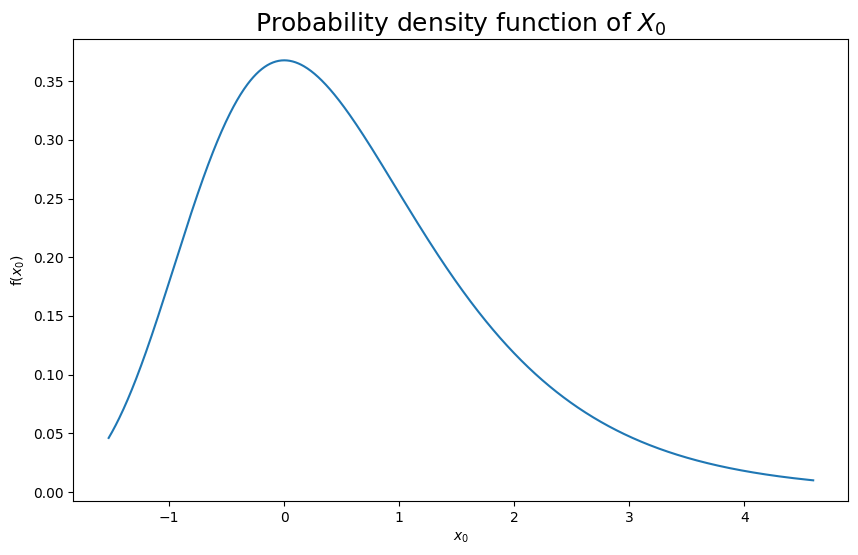

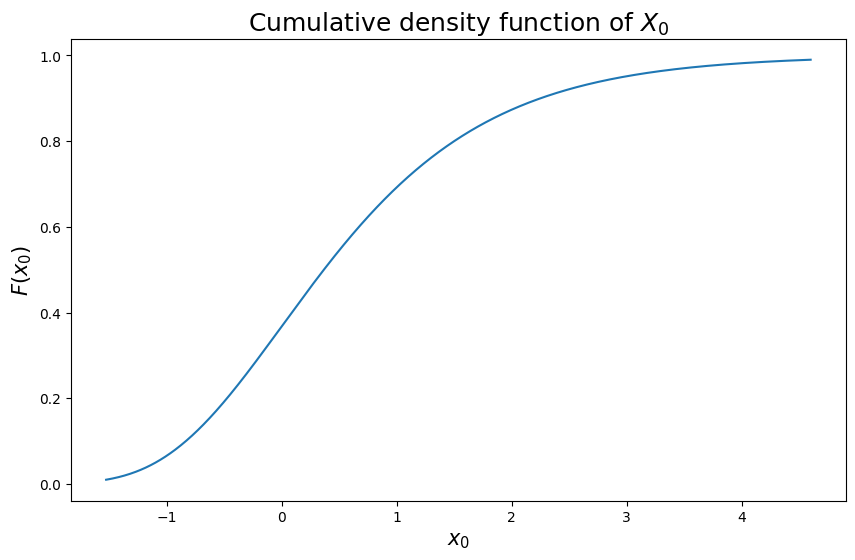

In [7]:
# Note that the number i, indicates which RV defined in the object is plotted
Bivariate_1.drawMarginalPdf(i = 0)    # Plots the marginal pdf's
Bivariate_1.drawMarginalCdf(i = 0);   # Plots the marginal cdf's

(<Figure size 1000x400 with 1 Axes>, <Axes: xlabel='$x_0$', ylabel='$x_1$'>)

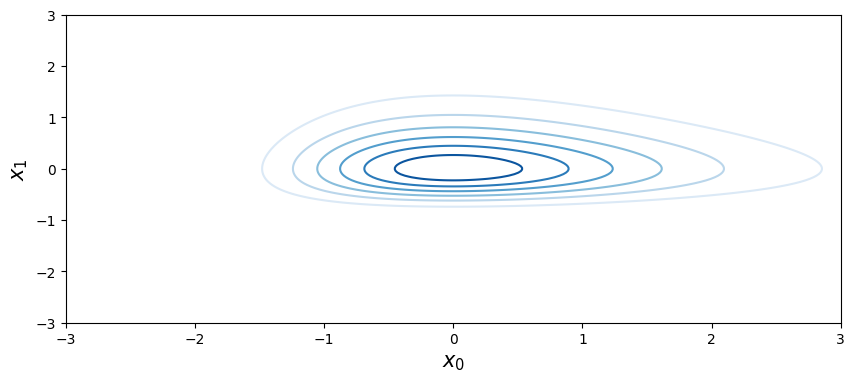

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a single plot with one set of axes
fig, ax = plt.subplots(1, 1, figsize=(10, 4))


Bivariate_1.plot_contour(ax = ax, xlim = [-3,3], ylim = [-3,3])

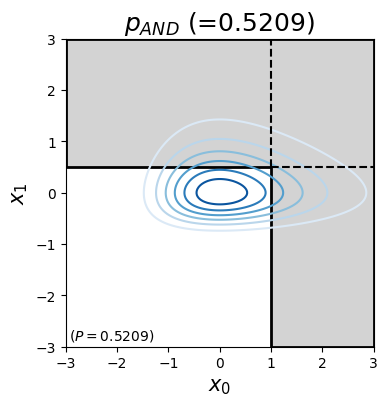

In [9]:
# Create a single plot with one set of axes
fig, ax = plt.subplots(1, 1, figsize=(10, 4))


Bivariate_1.plot_contour(ax = ax, xlim = [-3,3], ylim = [-3,3])
Bivariate_1.plot_or(1, 0.5, ax = ax, xlim = [-3,3], ylim = [-3,3]);

## Playing around with the myLSF

In [10]:
def myLSF_func(variables):
    '''Creates a myLimitStateFunction

    This function creates a limit state function, used in bi-, multivariate calculations

    Parameters
    ----------
    variables : list
        x[0] = Random variable 1
        x[1] = Random variable 2
        ....
        x[n-1] = Random variable n


    Returns
    -------
    function
        The limit state function
        

    Examples
    --------
    If one wants to create a limit state function of the following form:
    .. math::
        RV_x1^2 - RV_x2 = 0

    >>> myLSF_function = variables[0]**2 - variables[1]
 

    ''' 
    myLSF_function = variables[0]**2 - variables[1]


    return myLSF_function

In [12]:
# Define the the Bivariate object
Bivariate_2 = class_multivar.Bivariate([Y1,Y2],    # Note notation
                 family = "Normal",              # Type of copula
                 parameter=0)

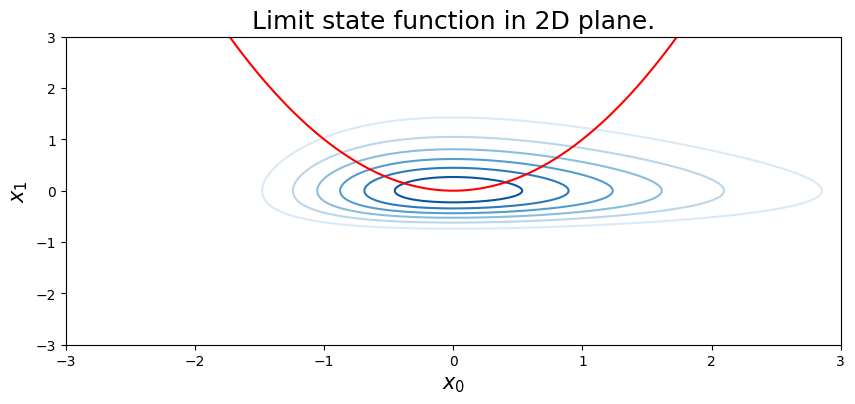

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

Bivariate_2.plot_contour(ax = ax, xlim = [-3,3], ylim = [-3,3])
Bivariate_2.plotLSF(myLSF_func, ax = ax);

In [ ]:
class_multivar.Bivariate?

Init signature: class_multivar.Bivariate(RandomVariables: list, Family, Parameter_x=0)
Docstring:      <no docstring>
Init docstring:
Attributes of the Bivariate class.

Parameters
----------
RandomVariables : `list` of `objects: scipy.stats.distributions.
    List of Random Variables
    Random Variables defined as object with scipy.stats.distributions.
Family : `str`    #rrrrrrrrrr is family the correct name?
    Types of bivariate copula:
    - Normal
    - Clayton
    - Independent
    - Can be extended to other copulas
Parameter_X : `float`     #rrrrrrrr What is this parameter? 
    Description of `param3`.
    
Examples
--------
If one wants to create a bivariate distributions of:

.. math::
    RV_x1 ~ N(0,1)
    RV_x2 ~ N(0,1)
With a Normal copula with parameter 0.0, one can input:

>>> RandomVariables = [scipy.stats.norm(0,1), scipy.stats.norm(0,1)]
>>> Family = "Normal"
>>> Parameter_x = 0.0
>>> Bivariate(RandomVariables, Family, Parameter_x)
File:           c:\users\sieme\on